## Logistic Regression

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df=pd.read_csv("loan_data.csv")

In [10]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


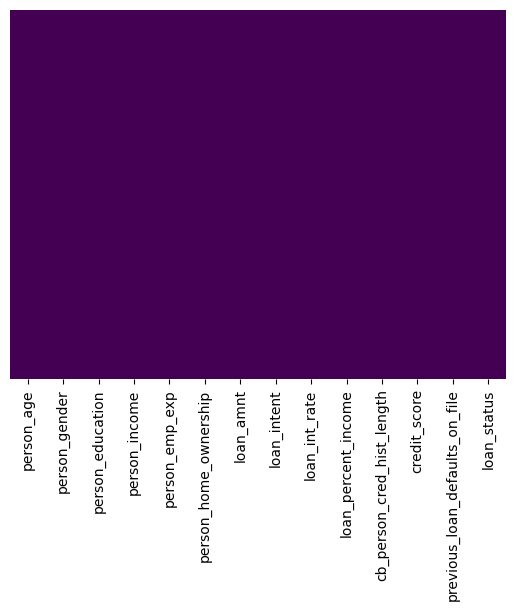

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Defining X and Y

In [16]:
features=[
    "person_income",
    "loan_amnt",
    "loan_percent_income",
    "credit_score",
    "loan_int_rate",
    "cb_person_cred_hist_length",
    "person_emp_exp",
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file",
]
X= df[features]
y= df["loan_status"]

## Encoding Categorical Variables Using pd.get_dummies

In [17]:
X_encoded= pd.get_dummies(
    X,
    columns=[
        "person_gender",
        "person_education",
        "person_home_ownership",
        "loan_intent",
        "previous_loan_defaults_on_file",
    ],
    drop_first=True
)

In [18]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel=LogisticRegression(max_iter=2000, solver="liblinear")

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [74]:
predictions=logmodel.predict(X_test)

In [79]:
predictions

array([0, 0, 0, ..., 0, 0, 0], shape=(9000,))

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [33]:
cm=confusion_matrix(y_test, predictions)

In [34]:
cm

array([[6521,  479],
       [ 540, 1460]])

In [35]:
cm_display=ConfusionMatrixDisplay(cm)

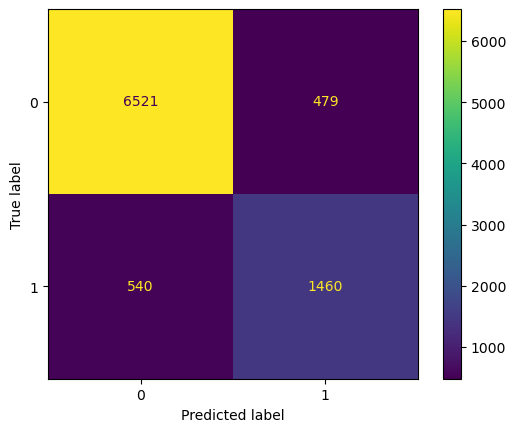

In [36]:
cm_display.plot()
plt.show()

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7000
           1       0.75      0.73      0.74      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.83      9000
weighted avg       0.89      0.89      0.89      9000



In [38]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

In [39]:
y_score=logmodel.decision_function(X_test)

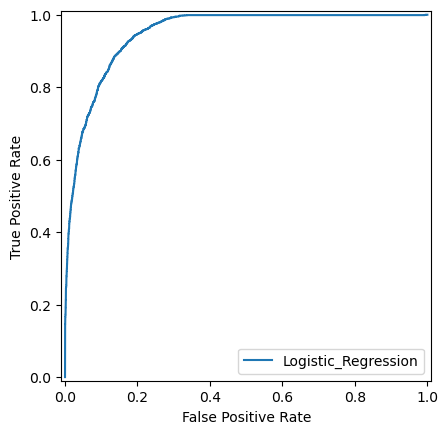

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=logmodel.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label="Logistic_Regression")
plt.show()

In [41]:
roc_auc_score(y_test, y_score)

np.float64(0.9486609285714288)

## Decision Trees

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df=pd.read_csv("loan_data.csv")

In [44]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [45]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


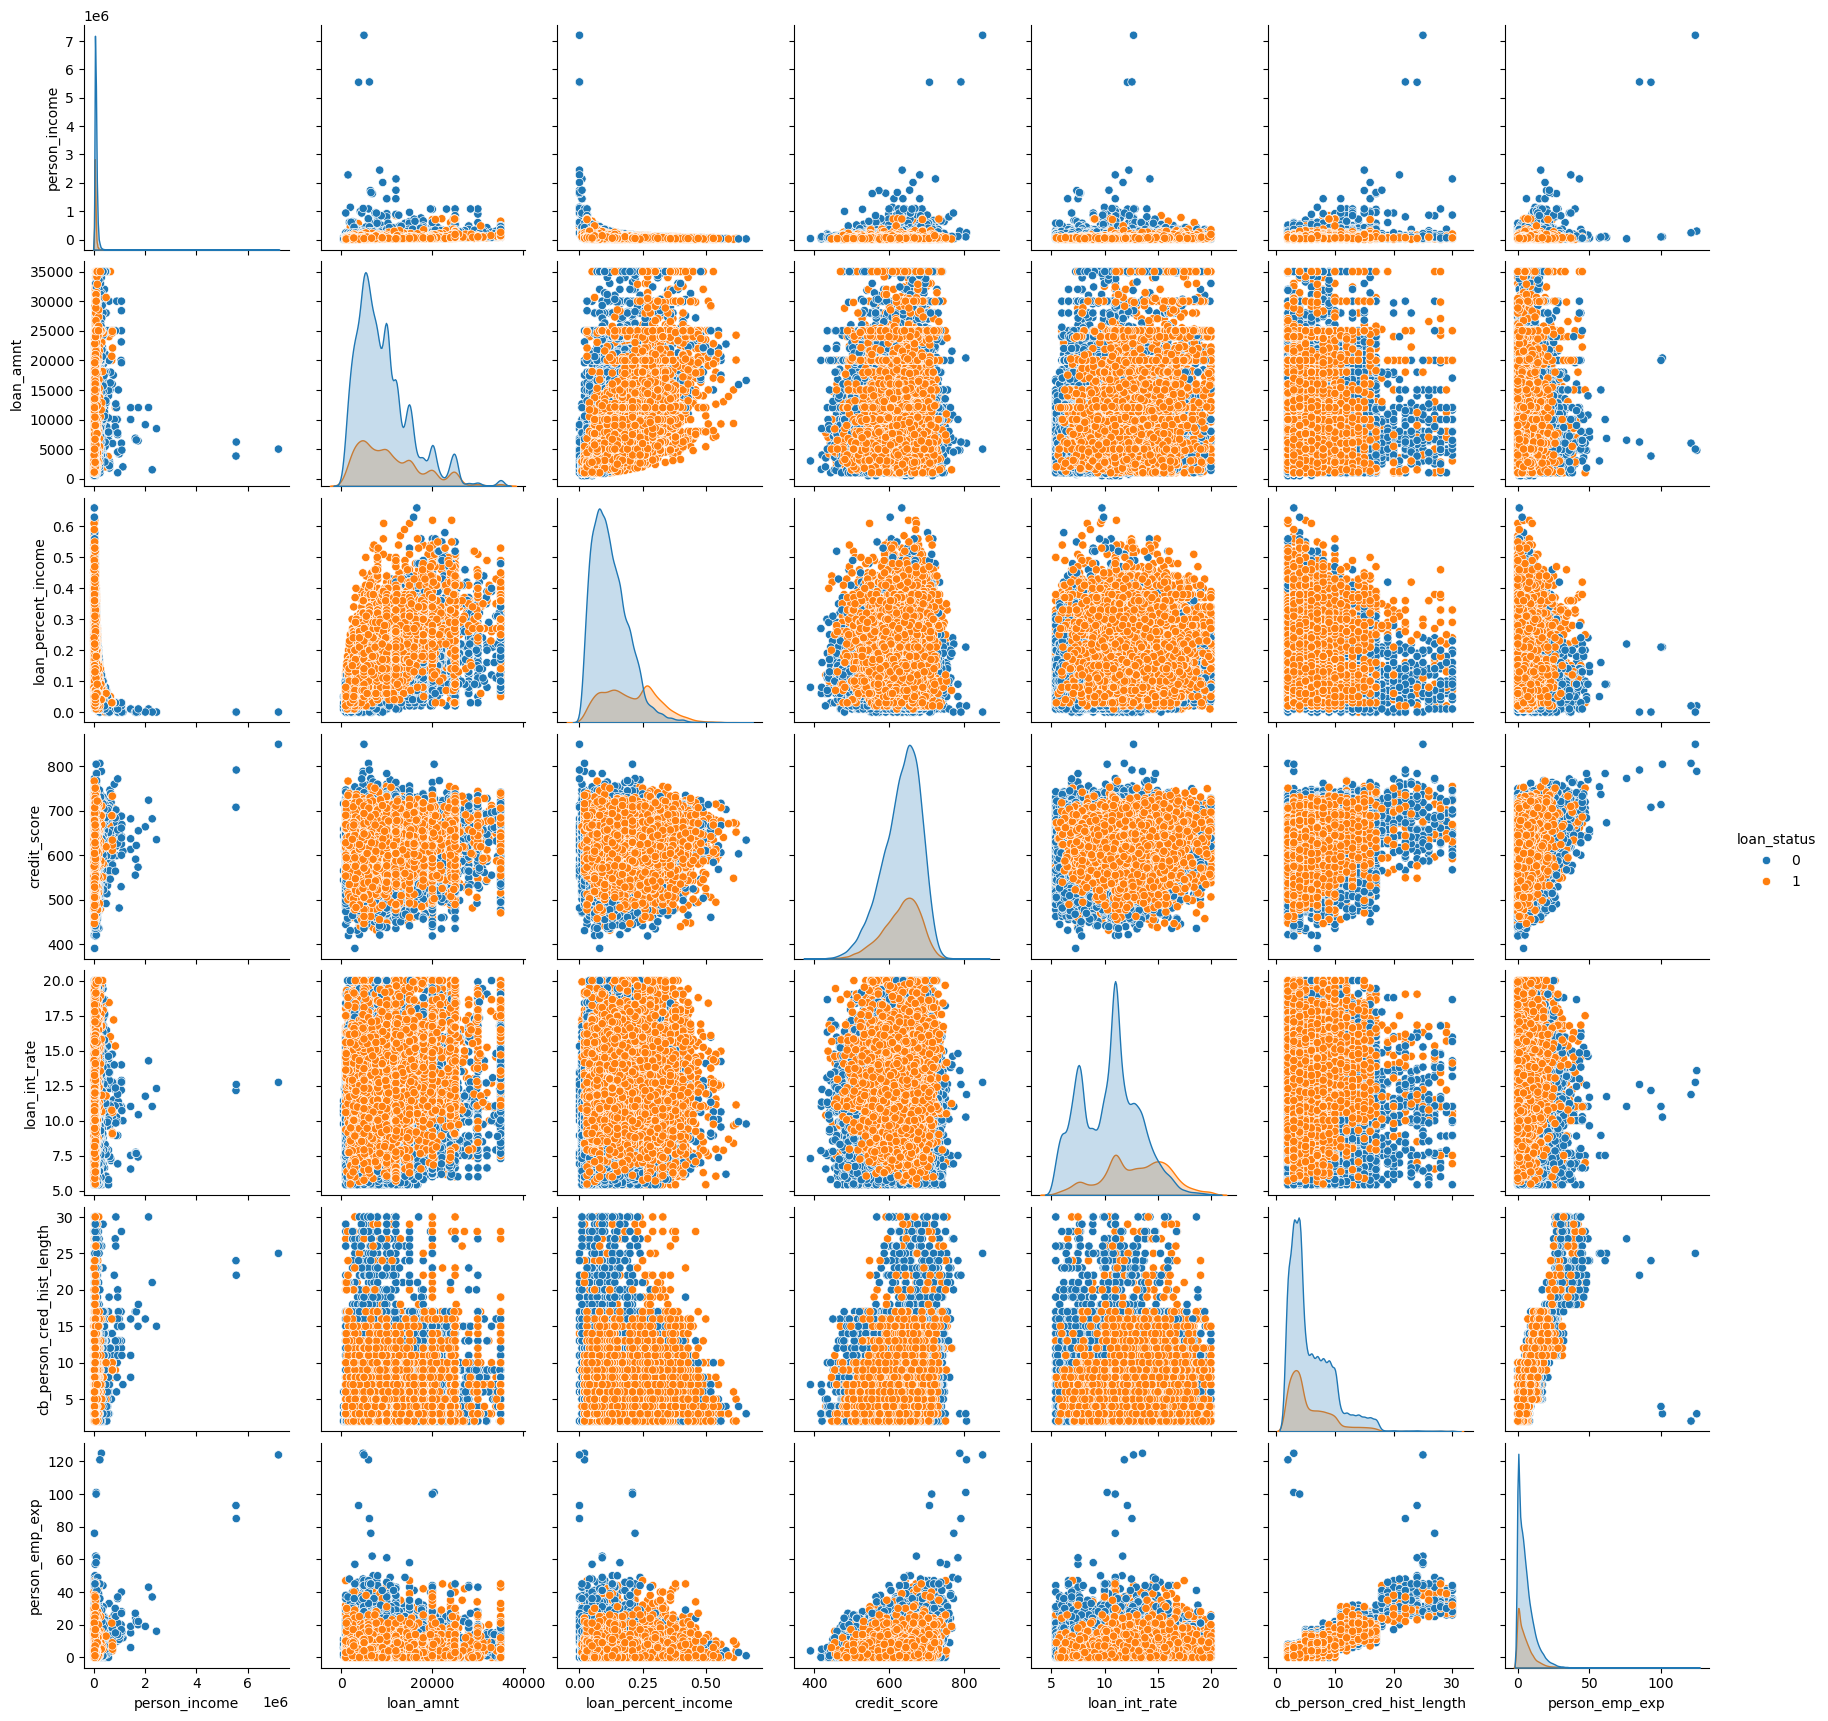

In [82]:
sns.pairplot(df[
             ["person_income",
    "loan_amnt",
    "loan_percent_income",
    "credit_score",
    "loan_int_rate",
    "cb_person_cred_hist_length",
    "person_emp_exp",
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file",
                 "loan_status"
             ]
            ], 
            hue= "loan_status"
            )
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

In [126]:
X=df.drop("loan_status", axis=1)
y=df["loan_status"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [128]:
dtree=DecisionTreeClassifier()

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
predictions=dtree.predict(X_test)

In [145]:
dt=confusion_matrix(y_test, predictions)

In [146]:
dt

array([[6521,  479],
       [ 438, 1562]])

In [147]:
dt_display=ConfusionMatrixDisplay(dt)

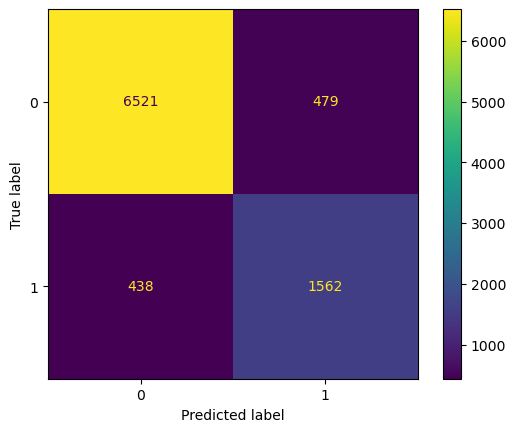

In [149]:
dt_display.plot()
plt.show()

In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7000
           1       0.77      0.78      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.86      0.85      9000
weighted avg       0.90      0.90      0.90      9000



## Random Forests

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfc=RandomForestClassifier(n_estimators=100)

In [135]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
rfc_predictions=rfc.predict(X_test)

In [137]:
print(confusion_matrix(y_test, rfc_predictions))

[[6824  176]
 [ 470 1530]]


In [138]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



## Gaussian Naive Bayes classifier

In [139]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [140]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9000,))

In [141]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8041


In [142]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

print(cm1)

[[6735  265]
 [1498  502]]
